In [10]:
import numpy as np; from matplotlib import pyplot as plt
import astropy.constants as c; import astropy.units as u

In [91]:
with open('pv.csv', 'r') as f:
    d = f.read()  # Read in the data
    d = d.split('\n')  # Split at returns
    d = d[:-1]  # Remove last element (since it's blanck)
    d = [i.split(',') for i in d]  # Split each line at commas
    print(d[0])
    d = d[1:]  # Remove the header

['Galaxy ID (AGC)', ' 2M++ Modelled peculiar velocities (km/s)', 'Tully-Fischer Peculiar Velocity (km/s)']


In [92]:
d

[['323', '339', '283.565900032187'],
 ['379', '377', '320.740333891239'],
 ['100381', '393', '297.105778360345'],
 ['400387', '-425', '10.1355031483283'],
 ['20819', '-506', '-24.4571135358872'],
 ['21001', '-344', '41.2015493793465'],
 ['947', '86', '182.479516791583'],
 ['1118', '301', '250.100341924082'],
 ['21327', '-453', '-46.2371942470554'],
 ['1261', '495', '412.312398426053'],
 ['1451', '1261', '674.346447193125'],
 ['1486', '902', '505.217911562119'],
 ['1706', '1074', '603.220615693104'],
 ['420055', '-451', '-5.47507517016356'],
 ['1828', '1203', '710.126533765811'],
 ['1888', '-232', '44.4208248153345'],
 ['1913', '-718', '-136.404236663195'],
 ['2138', '341', '311.73712657813'],
 ['22008', '-197', '44.2464242178567'],
 ['2197', '925', '558.872957797778'],
 ['22132', '-93', '128.470814163846'],
 ['2497', '741', '442.32425683935'],
 ['23129', '-406', '4.28061518837262'],
 ['2936', '572', '381.826151986069'],
 ['23207', '-406', '-56.7751350094832'],
 ['23538', '-274', '78.81

Text(0, 0.5, 'PV$_{\\mathrm{TF} }$')

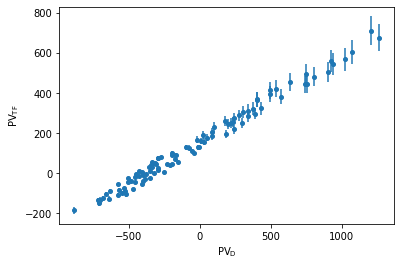

In [93]:
#2.1

d = np.array(d,dtype = 'float')
PV_D  = d[:,1]
PV_TF = d[:,2]

e = 0.1*PV_TF
plt.errorbar(PV_D, PV_TF, yerr=e ,fmt = 'o', ms=4)
plt.xlabel(r'PV$_{\mathrm{D} }$'); plt.ylabel(r'PV$_{\mathrm{TF} }$')
#plt.save

[  0.41838179 162.64420022]
[[ 3.41864197e-05 -2.24783390e-02]
 [-2.24783390e-02  2.16306014e+01]]


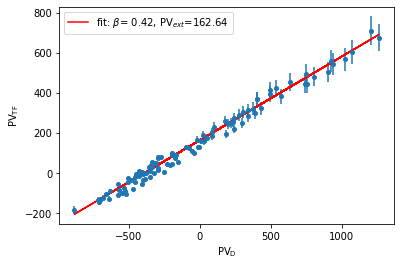

In [98]:
from scipy.optimize import curve_fit

def PVTF(vd, beta, ext):
    return beta * vd + ext

popt, pcov = curve_fit(PVTF, PV_D, PV_TF, sigma = 1/e, absolute_sigma = False) #0.1*PV_TF
print(popt)
print(pcov)
plt.errorbar(PV_D, PV_TF, yerr=e ,fmt = 'o', ms=4)
plt.plot(PV_D, PVTF(PV_D, *popt), 'r-',
         label=r'fit: $\beta$=%5.2f, PV$_{ext}$=%5.2f' % tuple(popt))
plt.xlabel(r'PV$_{\mathrm{D} }$'); plt.ylabel(r'PV$_{\mathrm{TF} }$')
plt.legend()
plt.savefig('pro2.pdf')

In [70]:
import numpy as np
from matplotlib import pyplot as plt

with open('tutorial_4.csv', 'r') as f:
    d = f.read()  # Read in the data
    d = d.split('\n')  # Split at returns
    d = d[:-1]  # Remove last element (since it's blanck)
    d = [i.split(',') for i in d]  # Split each line at commas
    d = d[1:]  # Remove the header


cz = np.array([float(i[4]) for i in d])

z = cz/3e5

np.average(z)


0.0105086

In [78]:
z

array([0.01524333, 0.01627667, 0.01619333, 0.00345333, 0.00479667,
       0.01119667, 0.00720667, 0.01071667, 0.01639667, 0.01576   ,
       0.01549333, 0.01599667, 0.01512333, 0.00555   , 0.01517   ,
       0.00421333, 0.00109   , 0.01631333, 0.01455333, 0.01629   ,
       0.01562667, 0.00974333, 0.00444667, 0.01233667, 0.01663667,
       0.01482667, 0.01152   , 0.01534333, 0.01434333, 0.01512   ,
       0.01655667, 0.01447667, 0.01074   , 0.01412   , 0.01476333,
       0.00412333, 0.01398   , 0.00737333, 0.00735   , 0.00447333,
       0.01099333, 0.00498333, 0.00400667, 0.00822   , 0.01000667,
       0.00861   , 0.01493   , 0.01631333, 0.00721   , 0.01156333,
       0.00546333, 0.00850333, 0.00746333, 0.00577333, 0.01088667,
       0.00688   , 0.01287   , 0.00861   , 0.01353667, 0.0152    ,
       0.00483   , 0.00960667, 0.01563333, 0.00551   , 0.01307   ,
       0.01659333, 0.00667   , 0.00688667, 0.01222667, 0.00488667,
       0.00851667, 0.01511667, 0.00870667, 0.00549   , 0.00897

In [88]:
np.sqrt(0.42**2*0.07**2)

0.0294

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


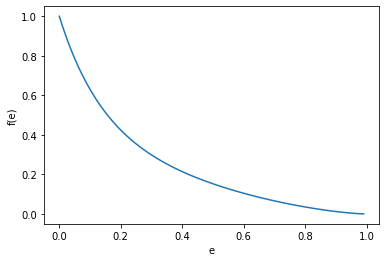

In [89]:
f = lambda e: (1-e)**5*(1+73*e**2/24+37*e**4/96)/(1-e**2)**(7/2)
e = np.linspace(0,1,100)
plt.plot(e,f(e))
max(f(e))
plt.xlabel(r'e'); plt.ylabel(r'f(e)')
plt.savefig('pro5.pdf')

In [72]:
(2*c.c**5/5/c.G).to(u.W)

<Quantity 1.4513498e+52 W>